# Module 4 - Fine-Tuning and Evaluating LLMs

> **Introduction**

This module is about some of the finer aspects of getting high quality LLM applications notably fine-tuning and evaluating LLMs. **We're going to talk about what to do if you know you've set up an application you have some data for it you have some feedback and you want to improve the quality of the model**. There are a lot of different ways you can do this. 

- Starting with what's called few-shot learning where you give a few examples of your task to the model in a prompt and get it to do it all the way to fine tuning where you actually update the parameters of the model to tailor it for your specific application. 
- The few shot learning with an existing frozen model some of the things you can do with LLMs as a service.
- Finally, **do it yourself fine tuning which you would mostly do with you know models you train yourself for open source models where you have full control over the process and can can can control many aspects of it to make it good at specific things**.


The other really important thing in this module is **evaluating LLMs and been able to systematically checking how well they're doing and improving that**. With classical machine learning it's sort of easy to evaluate because you know it's making some predictions you can check whether each prediction was right and you can give it a score, but, with something that's generating text it's a bit harder to evaluate. We'll see some techniques to do that. We'll also see a little bit upon alignment which is getting the model to not be offensive and to be friendly, to avoid doing certain kinds of things in general there isn't a little bit uh in in some sense about what is being asked and do, sort of content moderation.


**By the end of this module you'll understand when and how to fine-tune different types of large language models. We'll look at DeepSpeed and how we can use Hugging Face models to be fine-tuned specifically for our use case, and we'll look at how we can evaluate these different types of large language models so that we know that when we fine-tuned or customize these models that they're giving us the answers that we want**.

> **LLM Realeases and How to Choose**

Let's talk about a typical large language model release. We're going to consider the open source LLMs releases that tend to occur almost weekly at this point in time. 

- Usually they're released in a number of different sizes. So we have a foundation model which is a model that's just trained to predict the next word on all of the text that it's seen so far. These typically come in a base model size and then a smaller and a larger version. The size referes to the number of parameters or the amount of gigabytes that it might take up on your storage or RAM.
- It could also be released with different sequence lengths, so these are the amount of input tokens that we can give to a model in a single pass, this are newer techniques that allows LLMs to expand the amount of sequence length up to tens of thousands whereas typically we're limited to around four thousand. 
- We might also see that a LLM is released with some pre-fine-tuned versions along with the base model that is built just to predict the next word for a generative model. 
- We might also see a chat based model that is released with this foundation release that's been trained to converse in a more human-like interaction and we might also see an instruction-based model which is slightly different to the chat based model in that it's specifically designed just to respond to tasks that it has been given.


As developers we might wonder which direction do you take, which one do you choose?
- In every situation we're going to have to balance accuracy, which tend to favor larger models as the larger models typically will give better performance as they've seen more training data and have a larger parameter count to solve different problems.
- Speed, so the speed for inference is going to be an important factor and usually smaller models, because they take up less space and there are less calculations involved, are much faster at inference than larger models. 
- The task specific performance is also something to take into account. Larger models, while they might have a broad knowledge set, might not be as efficient or task-specific performance values might be different for these just bland large models rather than a fine-tuned model on a specific use case.

> **Example - How to Apply LLMs in an Application**

Our application is going to be a news app that summarizes the daily news articles and presents them as riddles for the users to read through to try and decipher what's going on. 

Let's think about how we might build this using the tools that we have available. We have a number of different potential LLM pipelines. Let's consider what we already have
- We'll have an application programming interface or an API connected to some sort of news outlet so that we can get daily articles of what's going on around the world. 
- We might have some pre-made examples written by either us or people that we know are good at writing riddles from news articles. In this case, we don't have too many samples but we've got enough to maybe do some few shot learning later on.
- If we think about the LLMs that were released by the community we could do some few-shot learning with that open source llm. We could use the instruction-following llm and do some zero-shot learning there. 
- We could use an llm as a service paid option. 
- Or we could go down the build our own path.

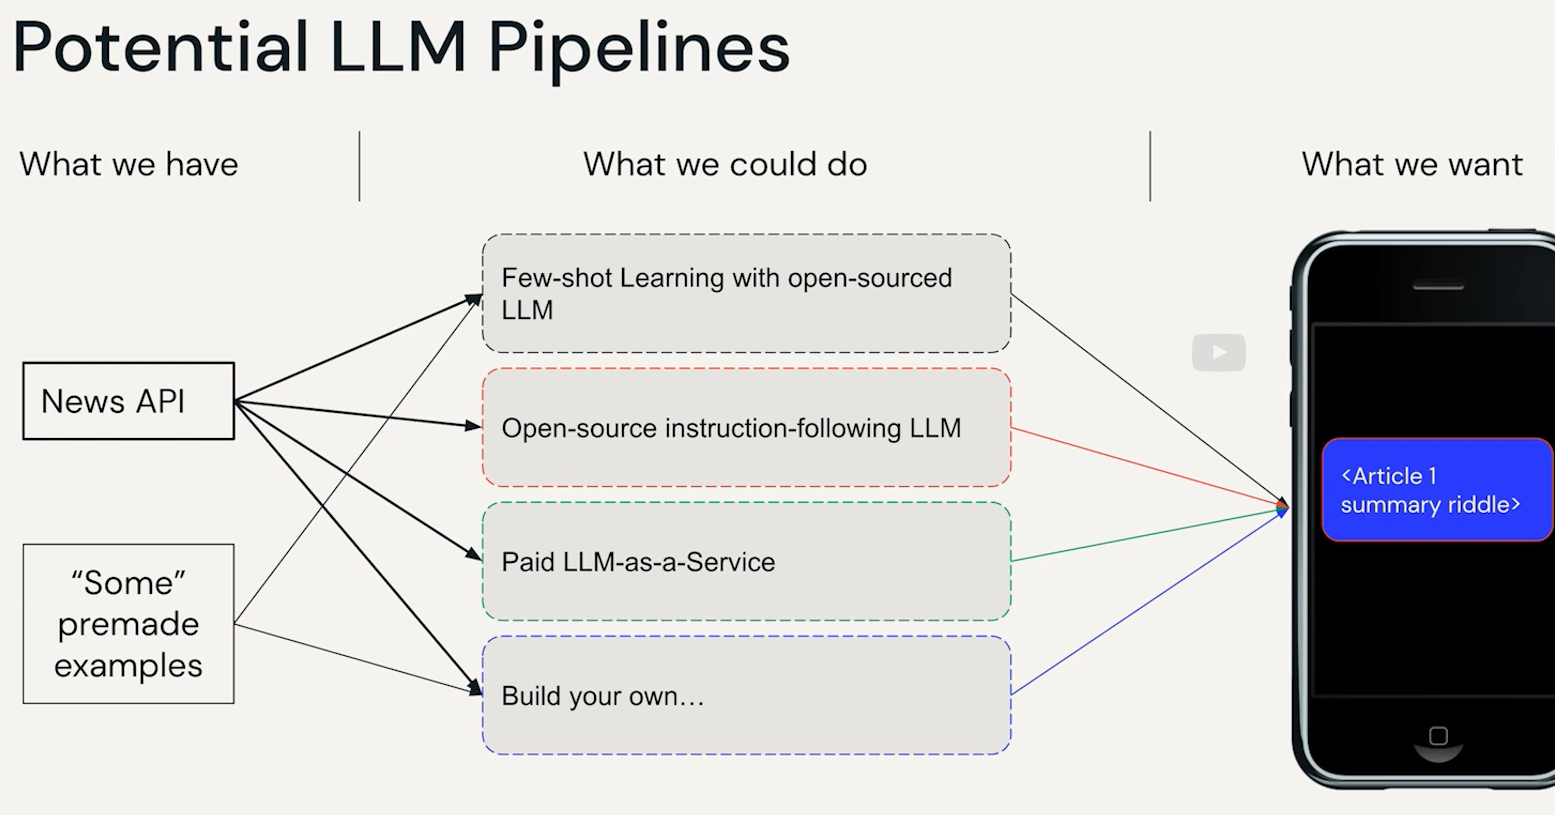

---
> **Based on Example - Apply Fine-tuning: Few-Shot Learning**

**PROS & CONS OF FEW-SHOT LEARNING**
- PROS
    - It's certainly quick to develop as we have all the data that we need and we just apply our llm as is with just a specified prompt.
    - For performance sake we'll need probably a larger model as the few examples that we have will be needed so that we can get good performance with a lower number of examples or with a smaller model we tend not to get as good a performance with few shot learning.
    - For the cost, since we're using a released open source llm we won't be doing any training we're just using it for inference, so we only have a minimal amount of computation costs associated.
    
    
- CONS
    - We need quite a few good quality examples that cover the intent and scope of the entire task so that we need to make sure that the few examples that we do have cover enough breadth for the articles that we expect to see in the real world, so that our model is able to infer enough information.
    - The size effect also is something that we touched on in the performance part of the pros but it's actually something that we need to consider as a con in that if we do need to use the largest or larger versions of the open source llm that can have some space and computation difficulties depending on how big the model actually is.



**PROMPTING**

An example of the prompting using Few-Shot Learning

```python
# Create a Prompt for Few-Shot Learning
prompt = (
    f"""
    For each article, summarize and create a riddle from the summary:
    [Article 1]: "Residents were awoken to the surprise ..."
    [Summary Riddle 1]: "In houses they stay, they peop ..."
    ###
    [Article 2]: "Gas prices reached an all time record ..."
    [Summary Riddle 2]: "Far you will drive, to find ..."
    ###
    
    ...
    
    ###
    [Article n]: {article}
    [Summary Riddle n]:
    """
)
```


We need to keep in mind though, that **for
these kinds of applications
we'll probably need a very long input
sequence model.
That might be a very large version of
the model or it might be one that's
actually quite difficult to get hold of
as long input sequence models are only
starting to be released**.
Typically for few-shot learning the larger
the base or foundation model that you
use the better the performance that you
have and so that will need to be taken
into account as well.

---

---
> **Based on Example - Apply Fine-tuning: Instruction-Following LLMs**

In this situation we're going to assume that we actually don't have any pre-made examples. 
- **Scenario that we do have pre-made examples**: then we could follow a very similar path to what we did in the few-shot learning example with just the foundation model. Depending on how the instruction model is constructed, depending on how it was trained using the foundation model or the instruction following model with few short examples might give similar results or the instruction model might be better or worse depending on how it was trained.

- **Scenario where you don't have any pre-made examples to work with**: in that situation, we'll actually need to utilize zero shot learning where we just describe the task and then give the article for the model to summarize.




**PROS & CONS OF INSTRUCTION-FOLLOWING LEARNING**
- PROS
    - Because we are assuming that we have no data available, we might need to pay more attention to how we construct the prompt so that it's very specific and well thought out for the model to follow.
    - Performance. Depending on the dataset that was used to train the fine-tuned model from the base model, it might actually already be excellent at solving this problem even with a zero shot approach.
    - For cost likewise because we're using a open sourced llm that's already been trained, we only pay for the computation at inference. We're not doing any training ourselves.


- CONS
    - However if the fine-tuning of this model meant that it actually doesn't really know how to do this kind of task then that might degrade the performance that we have and this might not be a viable option for us.
    - Likewise for the size effect, depending on how the model was trained we might need to use the largest version if there is one of the fine-tuned model for this particular application.



**PROMPTING**

An example of the prompting using Instruction-Following Learning

```python
# Create a Prompt for Zero-Shot Learning
prompt = (
    f"""
    For the article below, summarize and create a riddle from the summary:
    [Article n]: {article}
    [Summary Riddle n]:
    """
)
```
---

---
> **Based on Example - Apply Fine-tuning: LLMs-as-a-Service**

In this scenario we're going to assume that we don't have any pre-made examples to send along with our news API results. But you could imagine that if we wanted to include some pre-made examples for few-shot learning with our paid llm as a service we could do that too. The goal for this though is to really look at how incorporating an llm as a service would fit into the workflow for your application.



**PROS & CONS OF LLMS-AS-A-SERVICE**
- PROS
    - **Speed of Development**: Because this is just another API call as your llm as a service it's very quick to get started and build up your application around this particular call. As this is just another API interface that you'll be using in the same in the same way as you would interface with the news API. 
    - **Performance**: Because we're dealing with all of the computation and all of the infrastructure on the server side of things the performance tends to be higher when dealing with another llm as a service as all of that is done off site rather than locally with your machines.


- CONS
    - **Costs**: One downside the llm as a service is the cost that you would pay as you send each token and receive each token. However you do have to balance that with the cost associated with running all of this on your own hardware.
    - **Data Privacy and Securiity Risks**: There is of course a risk for data privacy and security as all of the data that you send to the providers of the llm has access to the data in some format depending on the terms and conditions. You just need to be aware of what to expect your data be to be used for.
    - **Vendor Lock-In**: And likewise because you're using a vendor just as any other vendor in any other sort of situation you need to be mindful of vendor lock-in risks. If the vendors suffer outages, if they deprecate features or change the pricing structure that's something you're going to have to keep in mind as you build your application.



**PROMPTING**

An example of the prompting using LLMs-as-a-Service Learning

```python
# Create a Prompt for LLMs-as-a-Service / API
prompt = (
    f"""
    For the article below, summarize and create a riddle from the summary:
    [Article n]: {article}
    [Summary Riddle n]:
    """
)

response = LLM_API(prompt(article), api_key="api_key...")

```


**This is really the lowest effort and we tend to get very good performance from a closed source providers of llms at this stage in the sort of development cycle of large language models in general the proprietary software so far has outperformed the open source community**, though there's certainly a race to improve the performance of the open source community. If none of these situations really fit for us even the closed source proprietary versions, perhaps they're not as good as we really need. Maybe we really do need to fine-tune one of these
large language models.

---

---
> **Based on Example - Apply Fine-tuning: Do It Yourself**

When we come to building our own we have two options: 
1. Build our own base model foundation model from scratch which would include constructing the architecture for the base foundation model, we would need to gather a data set that encompasses a huge amount of training data sources and then we would fine-tune that model once that's been trained
2. Take an existing model and fine-tune it on just the data set that we have available

**Almost never we go down that first
path of training a foundation model from
scratch**. It requires the resources of a
very large company to do it properly and
cost efficiently in most cases really
only a dozen or so companies across the
world are doing this and making them
available in open source. It's just such
a time commitment, cost commitment, and
resource commitment that it's really
infeasible and unnecessary for almost
everyone else to do.

If we're going to **fine-tune an existing
large language model, this means that we
can really create a task specific
version of the language model for us**.



**PROS & CONS OF DIY**
- PROS
    - **Task Tailored Model**: It's for a specific use case.
    - **Inference Costs**: More tailored models often are smaller than training a LLM from scrach, making them faster in inference time. 
    - **Data & Model Control**: All the data and model information stays entirely within your locus of control.


- CONS
    - **Time and Computer Cost**: This is the most costly use of an LLM and it will required both training time and computational cost, though it's not too bad.
    - **Data Requirements**: LLMs needs a large dataset so that we can fine tune properly on.
    - **Skill Sets**: Require in-house expertise that enable us to be able to fine-tune these models. But if your taking this course then you should be okay.
    
---

---

> **Dolly LLM - 1st World Open Source Instruction-Tuned LLM**

Dolly is a:
- 12 billion parameter model based on the Eleutha AI pythia 12 billion parameter model.
- Is an instruction-following LLM which means that we can ask it to do specific tasks and it responds in the way that it was trained.


Dolly itself is not a state-of-the-art model, it's just an approach that shows that you can take a model such as the EleuthaAI open source model combine it with a high quality but open source data set and produce something that is commercially viable. Many new approaches are now taking place to combine this dolly 15K data set with even newer open source architectures. **This gave a hint though that we could actually use small models with high quality data sets to replicate the kinds of performance we're seeing from these larger models**.

---

---

> **Evaluationg LLMs - Training Loss/Validation Score**

While fine tuning is great and there's a lot of interesting applications that we can do by fine-tuning llms we still need some sort of guidance into knowing how well our model is performing on the tasks that we have defined for it. If we decide to fine-tune our model we really need to understand how to evaluate the model for its performance. Intuitively understanding how well a LLM performs is really quite difficult to verbalize or to come up with a consistent definition. **Whilst retraining of course we do look at things like the loss or the validation scores as we go through the training process as these are still deep learning models and they try to optimize some sort of loss function**.

But for a good LLM what does the loss really tell us? Nothing really, not really any of the traditional metrics you would see for some kind of binary classifier. If you remember **what a LLM does, it's really just producing a probability
distribution over the entire vocabulary of tokens and selecting which one it thinks is the right answer**.

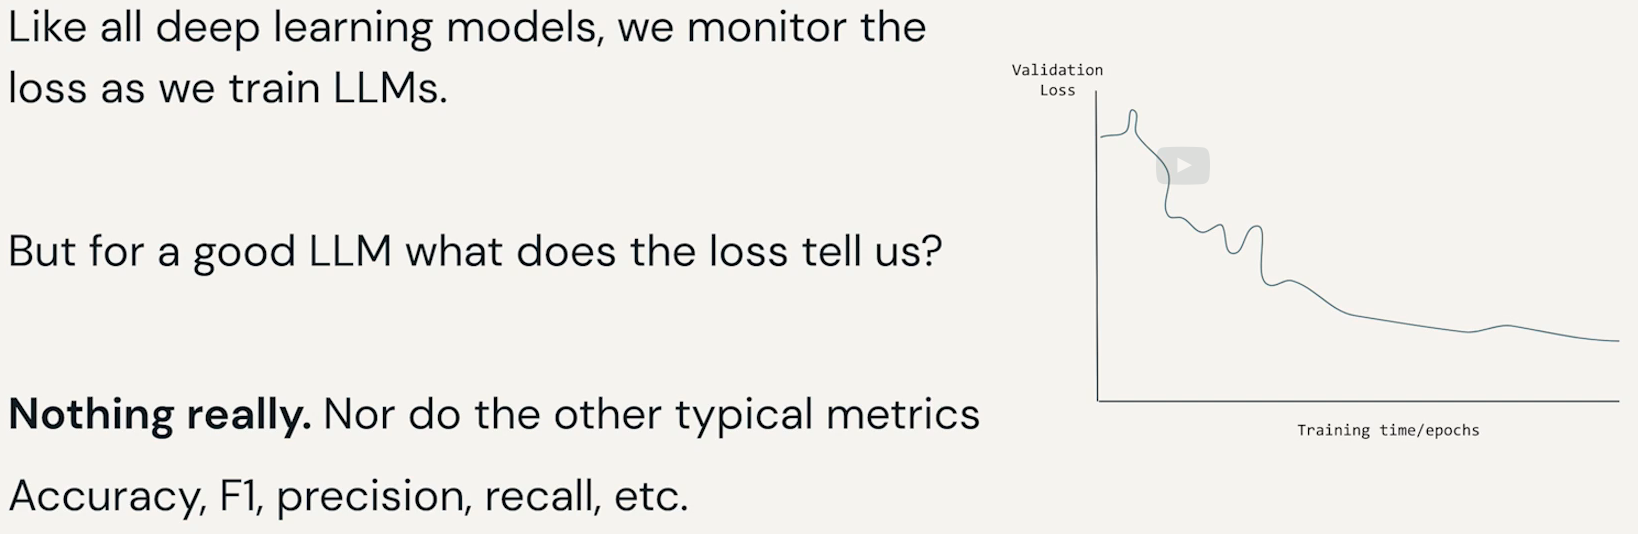

> **Perplexity**
One way that we can improve on just whether or not I got the right answer is looking at its perplexity.
- **Perplexity**:  It's how the spread of the probability distribution is over the tokens that its trying to predict. If we have a very sharp probability distribution of our tokens that means it has a very low perplexity and it knows then it's very confident that that is the token it should be picking. Whether or not that token is correct or not depends on the accuracy so really what a good LLM will have is high accuracy and very low perplexity.  It'll know which word should come next and it'll be correct in picking that word.

- **Perpexitly Limitations**:Perplexity though is really not the end of the story either, even though we're confident and correct about picking the next word that doesn't necessarily mean that we're getting a good quality of the result they're getting we don't have any context for the rest of the words that is picking in that sentence if it's choosing the same word again and again maybe that has a high value of accuracy and a high value or a low value of perplexity but if we're doing say translation or summarization that's probably going to be complete nonsense. So what we need to look at is task specific evaluation metrics.

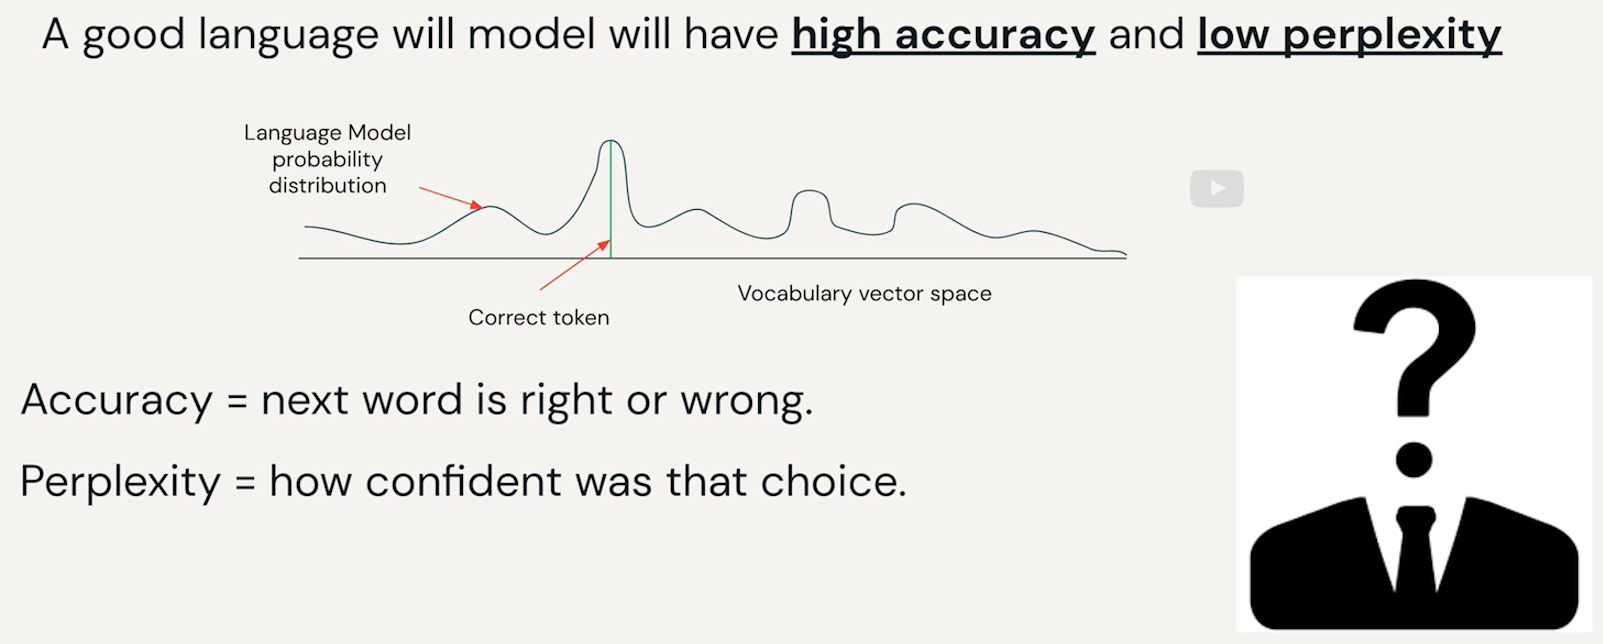

---

---

> **Task Specific Evaluation - BLUE for Translation**

For translation we can use the BLEU metric which evaluates how well our output compares to reference samples of the translations that we want to produce.
In **BLEU we calculate how many unigrams, those are single words, appear in the output compared to our reference. We also look at how the bigrams, trigrams and quadgrams appear in the output from our model compared to our reference samples.
BLEU then combines all of these and creates the geometric mean of the uni, bi, tri, and quad grams and gives the total value for the BLEU metric**.

A unigram in this situation is a single word so if a word appears, say, six times and it's the exact same word it will actually have a very high value for the unigram score in BLEU. However when we extend this to the bigram and trigram case we'll see that the values quickly
drop off to zero. **If we have a very good translation we'll see that it matches very well the references and so we'll get a high value for the BLEU score**.



> **Task Specific Evaluation - ROUGE for Summarization**

**ROUGE is quite similar to BLEU in how it matches the reference samples to the outputs given by the summarization model. In this situation however it also takes into account the length of the summary so that we have as short as summary as possible. If we have quite a verbose summarization but it still contains many of the words in our reference sample that does so-so but not fantastically. ROUGE then looks for situations where both words are common in both the sample and the output but also that the output is as small as possible relative to the reference samples**. 


- **NOTE - How to Benchmark our Model and Evaluate** But what if we want to do something where we're not using just our data. What if we want to benchmark our model compared to other models. We might not have the same datasets that they have and so that's why the community has also produced benchmark datasets so that we can evaluate our models and compare that to the others in the community. SQuAD the Stanford Question and Answering dataset is a very commonly used toolkit which contains a number of different data sets that we can use for our models to compare different LLMs as they've been fine-tuned.


> **Evaluation Metrics at the Cutting Edge**

Finally some of the more cutting edge
evaluation metrics focus on things like
alignment. And that's how well if we give
say an instruction following llm a
particular task does it give us one: a
relevant result based on the input that
we asked it.
Does it give a hallucination which we'll
look more at in the next module and is
it harmless? Is there a measure of
toxicity or
profanity in the response that we might
want to reduce depending on the
particular use case. Different evaluation
metrics are used by researchers and even
more becoming produced day by day the
problem of alignment though is still a
very critical component in modern llm
research.

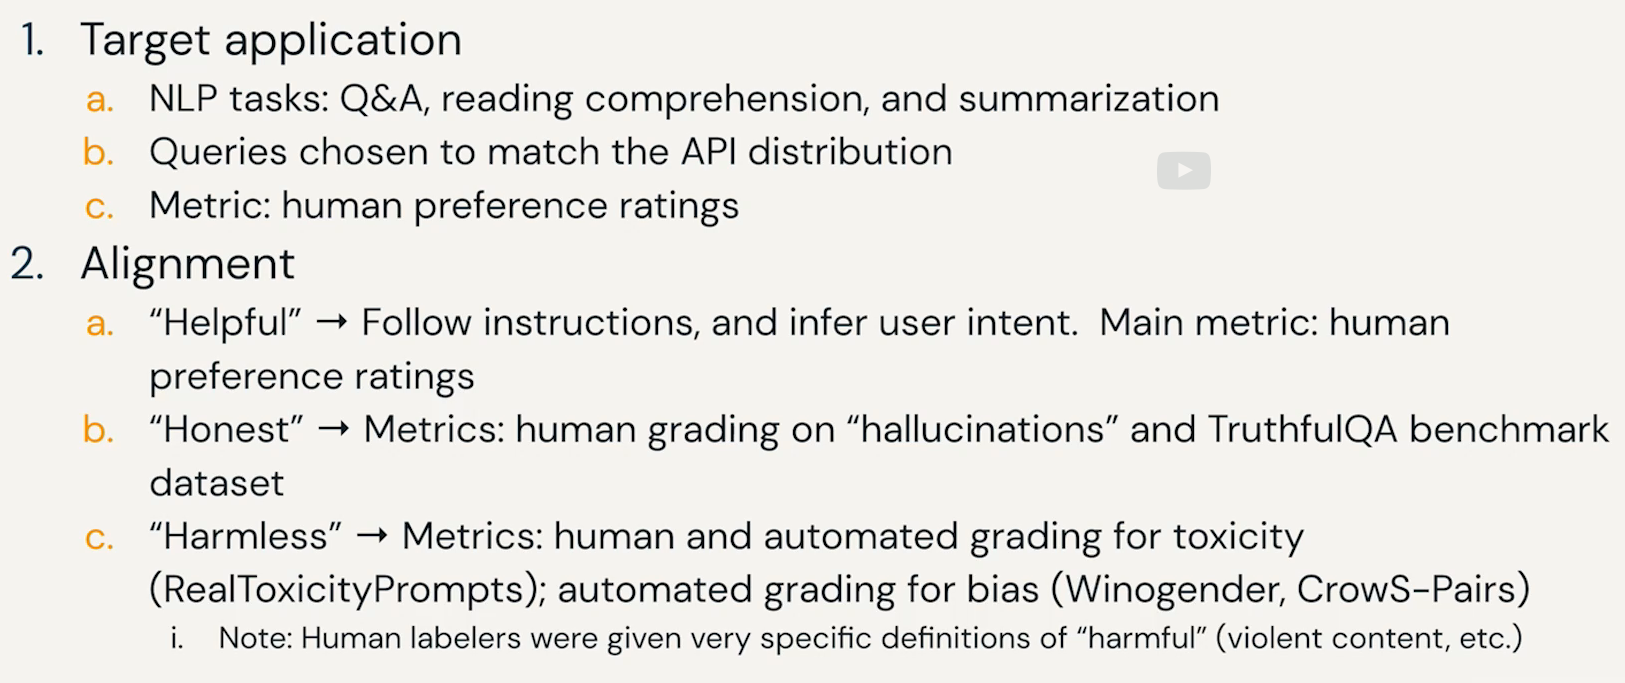

---

---

> **Lang-Chain Creator Talk**

Hi my name is Harrison Chase, creator
of LangChain. A framework for developing
LLM applications. Today I'll be
talking about evaluation of llm chains
and agents.
So today I'll cover an overview of
llm chains and agents, what are they,
why are they interesting, why are
they useful. Then I'll talk about why
evaluation of these changing agents is
hard primarily due to two main reasons:
lack of data, and lack of metrics. I'll
then discuss a few potential solutions
that are emerging as best candidates and
then I'll talk about offline and online
evaluation which are just two concrete
representations of applying these
solutions for evaluations to the problem
at hand.


> **Overview of LLM Chains and Agents**

The core idea of this is using an
llm as the reasoning engine. So we'll use
the llm to determine how to interact
with other sources of data and
computation, but crucially we will use
those sources of data and computation
for their
knowledge rather than using the
knowledge that's present in the llm.
We'll use the llm more as a reasonable
engine. And so the canonical example of
this is retrieval augmented generation.
And we can think of this as a chatbot
that can answer questions about
particular documents so documents that
are proprietary to you that the language
model GPT-3 or whatever has not been
trained on.

The general flow for this type of
application is first you'll have the the
chat history which you'll condense into
a standalone question. And this is
important because you'll use that
question to retrieve the relevant
documents. If you don't do this
convention step
and you only use the final chat
message in the chat history it could be
referencing things prior that you won't
know about. So this so this condensing
step is really important.
So you do that then you look up relevant
documents and you get back a list of
relevant documents and then you pass
this to a language model to generate the
final answer and so this will take in
the original question the chat history
the retrieve document, which here now
which the prompt will generally ground
the the response in and it will generate
a final answer. And so here you can see
that we're using the language model as a
reasoning engine which takes in a
question and some some data and then
reasons about an answer relative to the
data that's been provided. But we're
basing everything, we're we're grounding
everything in that data that we've
retrieved we're not using the knowledge
present in the language model itself for
that.


> **Why Evaluation is Hard - Lack of Data and Metrics**

**Lack of Data**

First is due to a lack of data. So unlike traditional problems in machine learning you generally don't start with a data set. You generally start with an idea, an problem or an application that you want to build, and then you start building and then you need to evaluate it and you don't have you don't have the traditional machine learning training data set to start from. It's also unclear for this what the data set would even be so for a lot of these
questions. If we start to think of some
of the more complex ones they could be
constantly changing based on the day. So
a lot of question answering applications
have to do with up-to-date data, so it's
unclear if there's even a ground truth
answer that remains constant over
time so it's really challenging to
gather data.


**Lack of Metrics**

The other issue is a lack of metrics so
it's hard to even evaluate with
your eyes. So a lot of these applications
if you think about the chain before
there's there's three different steps
that could be going wrong at any of
those intermediate steps and you might
not necessarily know which one and where.
And then it's also tough to evaluate
quantitatively, with metrics looking at
the at the final answer. So in the
question or in the example above of a
question answering chatbot, the final
answer that the chatbot gives is
freeform text. And so it might have a
particular fact in it and that's the
thing that we should be evaluating but
there's a lot of conversational text
around it as well so you can't do things
like exact match on that text and you
need to do some
sort of of more advancing so which we'll
talk about later.


> **Potencial Solutions - Best Practices**

**Addressing the Lack of Data**

First around the lack of data. There's
two things here that that people tend to
do. One is generate data sets ahead of
time and so you can generate these
programmatically and often times a
language model is part of that
programmatic generation of these things.
So in the example of question answering
over a document if you want to generate
a test set for it one thing one
chain that we commonly used to do
that is a chain that splits the document
up into chunks and then for each chunk
you ask the language model to generate a
question and answer pair and that
becomes kind of your test set for
this application.
The other thing that is commonly done to
gather this data is just accumulated
over time, so if you have a application
running in production you can keep track
of the inputs and outputs and you can
start to eventually add these to a data
set and grow that data set over time.


**Addresssing the Lack of Metrics**

The first and most
important thing is just to make it
really easy to inspect visually what's
going on. So what are the inputs and
outputs at each step in the chain. What
are the inputs when it finally goes to
the language model and it finally comes
back. This is really important for
understanding if the application is
messing up due to a lack of retrieving
the right information or it's retrieved
the right information it's just not
synthesizing it properly.
Another thing that we can do is use a
language model to judge whether the
final answer is correct or not so this
will handle the cases where there's a
fact but it's surrounded by a bunch of
conversational texts and so we'll use
the language model to take a natural
language answer and then a natural
language ground truth label and compare
whether they're semantically equivalent.
And then the final thing that we can do
here is we can just gather feedback,
directly or indirectly, from users
and so I'll talk a little bit more about
this during an online evaluation.


> **Offline Evaluation**

The main way to evaluate chains and agents
in an offline manner, is create a data
set of test points to run against. You
then run the chain or agent against them
you then visually inspect them so you
can you can look at the inputs and
outputs at overall, at each step, see
how it's doing, and then that's not
really scalable of course. And so then
the next thing to do is use a language
model to auto-grade them and you can
either
fully trust this auto-grade. So you could
have it assigned correct or incorrect to
each run and then just average that, or
you could just use that as a way to
guide your eyes to the data points that
might be most correct or incorrect and
then do another visual inspection on top
of there.
An offline evaluation is usually used
before the model goes in to production
so this can be right after you've
finished developing it and you're
doing a final test to see whether it's
ready to go in production.

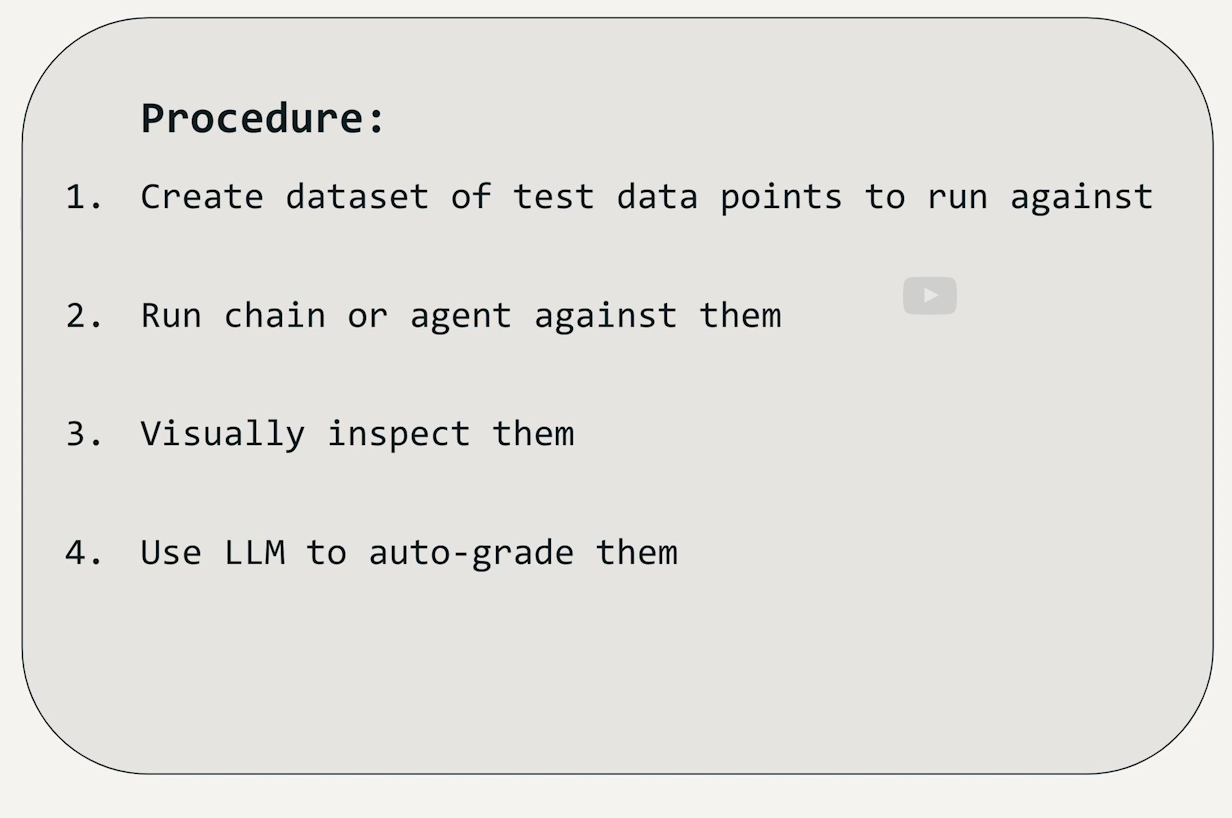



> **Online Evaluation**

Online evaluation, on the other hand, is
after the model's been deployed. So now
it's running in production you're
serving users and you want to make sure
that it's continuing to do a good job.
And so the main method of doing this is
gathering feedback on each incoming data
point so there's ways of gathering this
feedback directly. So you could add a
thumbs up or a thumbs down button to
your application and then you can click
on it and you can you can track this
feedback over time. And if you release a
new version of the application or if the
if the model starts doing poorly, for
whatever reason, you can hopefully notice
a downtrend in this feedback. And you
can use that as a mechanism to know that
you need to fix your model.
There's also other forms of feedback
that can be more indirect. So if you're
serving up, you know, relevant links if
someone clicks on a link that probably
means you did a good job if they did not
click then that means that
the model might not be doing a good job.
And so you can use this as an indirect
measure of feedback.
And both of these, the idea is to
track these over time, and you can start
to notice when the model performance
starts to degrade.

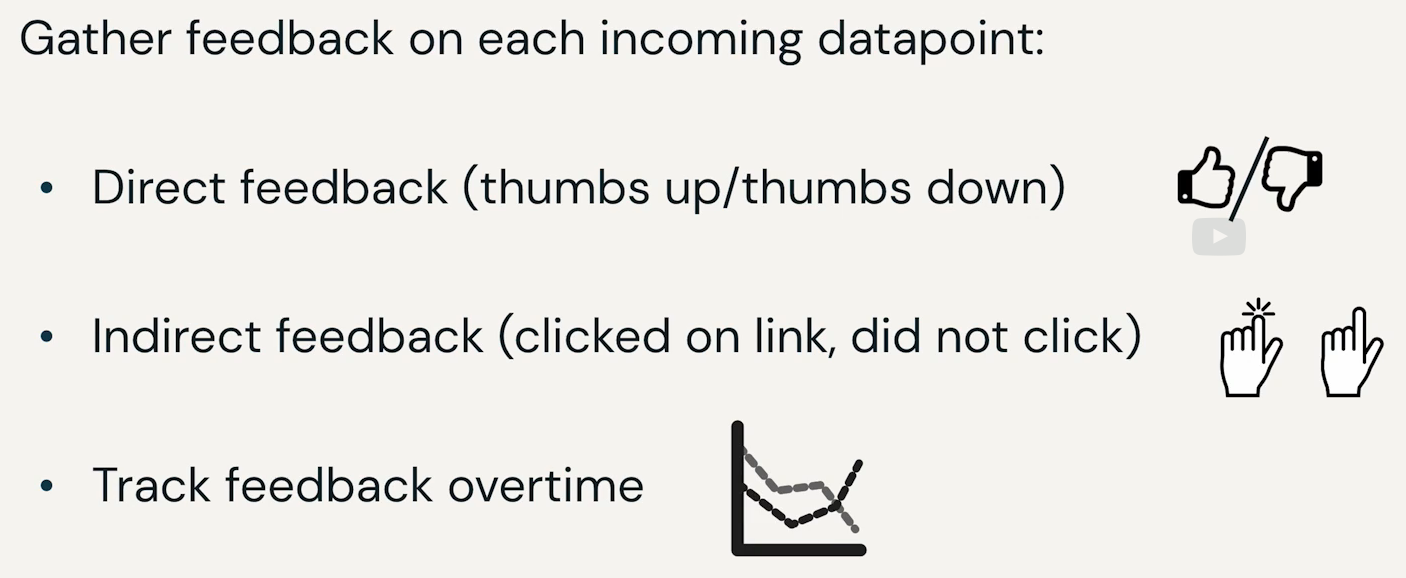

---

# Summary

We've looked at both fine tuning models and evaluating models based on different task specific duties
that they have to perform. I hope now also that you know which path to take when you're deciding whether to use an LLM from scratch, whether to fine-tune one, maybe to use an open source or a closed sourced offering and what types of evaluations you should use so that you can make sure that what you're getting is what you need for your applications.

- Fine-tuning models can be useful or even or even necessary to ensure good fit for the task.
- Fine-tuning is essentially is the same as traininig, but just starting on a checkpoint.
- Tools have been developed the training/fine-tuning process.
- Evaluation is crutial for model efficacy testing.
- Generic evaluation tasks are good for all models.
- Specific evaluation tasks related to the LLM focus are best for rigor.